Converted data saved to Z-Score_Output.csv


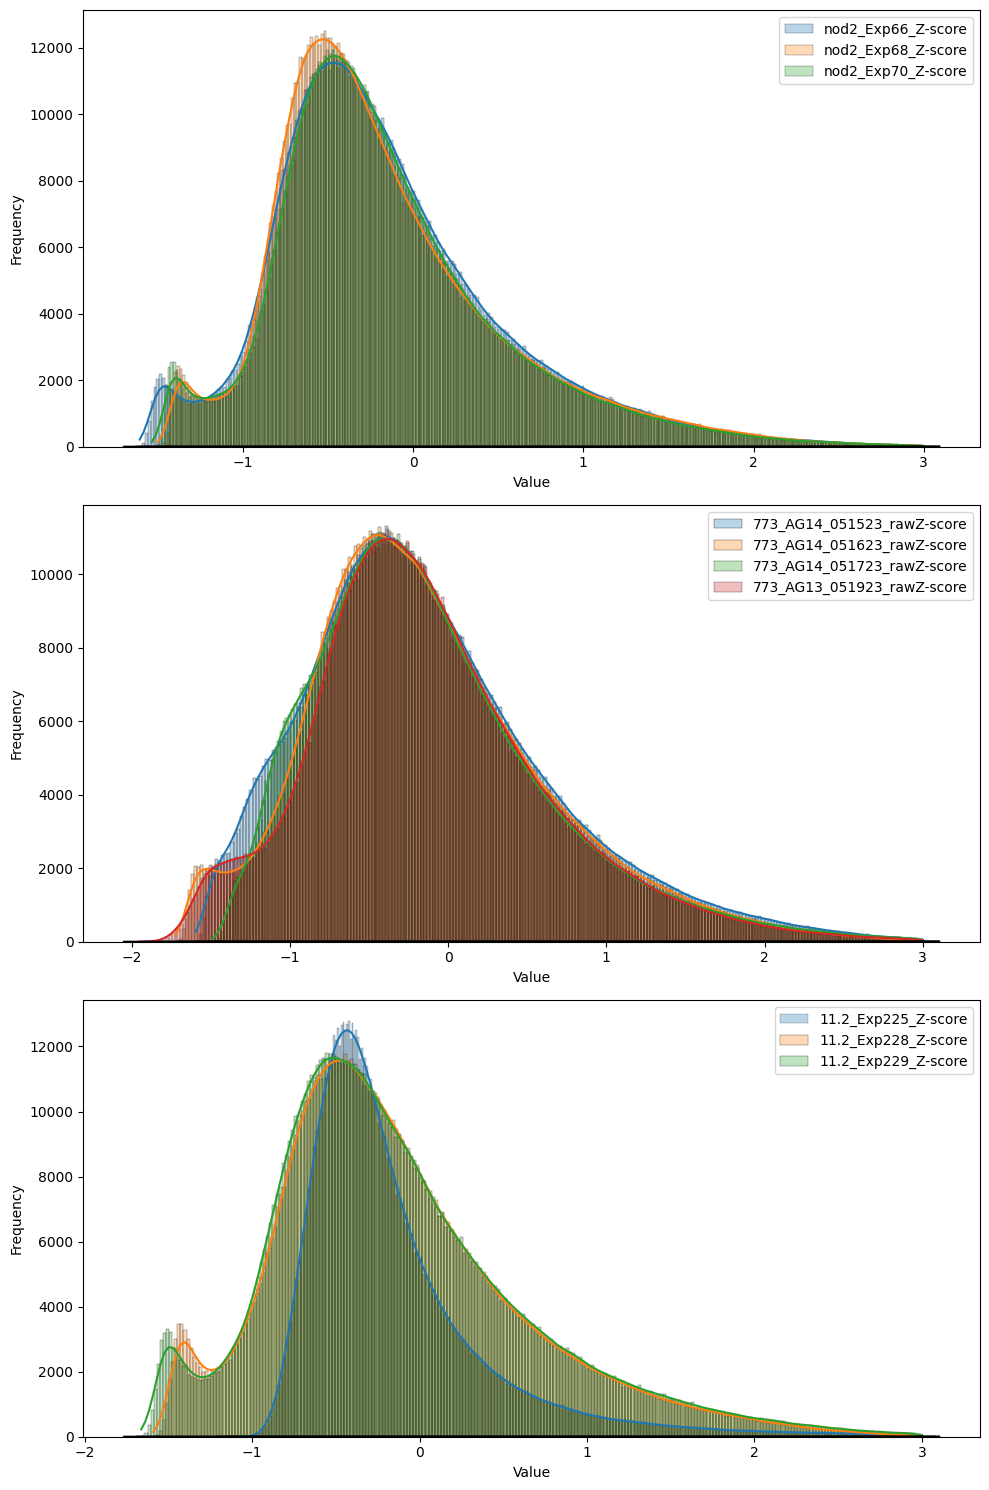

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def convert_to_z_score(df, columns_to_convert):
    """
    Convert specified columns to z-scores.

    Parameters:
        df (pandas.DataFrame): Input DataFrame.
        columns_to_convert (list): List of column names to convert to z-scores.

    Returns:
        pandas.DataFrame: DataFrame with specified columns converted to z-scores.
    """
    for col in columns_to_convert:
        # Check if column name ends with "rMedianSignal"
        if col.endswith("rMedianSignal"):
            # Remove "rMedianSignal" from the column name
            new_col_name = col[:-len("rMedianSignal")]
        else:
            new_col_name = col

        mean = df[col].mean()
        std = df[col].std()
        df[new_col_name + 'Z-score'] = (df[col] - mean) / std
    return df

def filter_outliers(df, columns_to_filter, threshold=3):
    filtered_df = df.copy()
    for col in columns_to_filter:
        # Check if column name ends with "rMedianSignal"
        if col.endswith("rMedianSignal"):
            # Remove "rMedianSignal" from the column name
            new_col_name = col[:-len("rMedianSignal")]
        else:
            new_col_name = col
        z_scores = np.abs(df[new_col_name + 'Z-score'])
        filtered_df = filtered_df.loc[z_scores <= threshold, :]
    return filtered_df


def main():
    # Read the input file
    file_path = '/Users/noahnicol/Desktop/Desktop/Job_Stuff/Proteovista/Protein Comparison/nod2_773_11pt2_03-28-2024_extraction_NRN.csv'
    df = pd.read_csv(file_path)

    # Specify columns to convert to z-scores
    columns_to_convert = ['nod2_Exp66_rMedianSignal', 'nod2_Exp68_rMedianSignal', 'nod2_Exp70_rMedianSignal', '773_AG14_051523_raw', '773_AG14_051623_raw', '773_AG14_051723_raw', '773_AG13_051923_raw', '11.2_Exp225_rMedianSignal', '11.2_Exp228_rMedianSignal', '11.2_Exp229_rMedianSignal']

    # Convert specified columns to z-scores
    df = convert_to_z_score(df, columns_to_convert)

    # Optionally, you can save the modified DataFrame to a new file
    output_file_path = 'Z-Score_Output.csv'
    df.to_csv(output_file_path, index=False)
    print(f"Converted data saved to {output_file_path}")

    # Filter outliers
    filtered_df = filter_outliers(df, columns_to_convert)

    # Create subsets for plotting
    NOD2 = filtered_df.iloc[:, 16:19]
    P773 = filtered_df.iloc[:, 19:23]
    P11pt2 = filtered_df.iloc[:, 23:26]

    # Plotting with Seaborn
    fig, axs = plt.subplots(3, figsize=(10, 15))

    for i, subset in enumerate([NOD2, P773, P11pt2]):
        for col in subset.columns:
            sns.histplot(subset[col], kde=True, ax=axs[i], alpha=0.3, label=col)
        
        # Add bell curve fit
        for col in subset.columns:
            sns.kdeplot(subset[col], bw_adjust=0.7, color='black', ax=axs[i])

        axs[i].legend()
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
# Read the CSV file
output_file_path = 'Z-Score_Output.csv'
df = pd.read_csv(output_file_path)

# Display the header of the DataFrame
df.head()


,ProbeName,Sequence,FeatureNum,Row,Col,ControlType,nod2_Exp66_rMedianSignal,nod2_Exp68_rMedianSignal,nod2_Exp70_rMedianSignal,773_AG14_051523_raw,...,nod2_Exp66__Z-score,nod2_Exp68__Z-score,nod2_Exp70__Z-score,773_AG14_051523_raw_Z-score,773_AG14_051623_raw_Z-score,773_AG14_051723_raw_Z-score,773_AG13_051923_raw_Z-score,11.2_Exp225__Z-score,11.2_Exp228__Z-score,11.2_Exp229__Z-score
0,GE_BrightCorner,NaN,1,1,1,1,18343.0,27546.0,10860.0,13351,...,7.770272,11.850229,4.913564,3.869906,4.422637,3.033822,2.215114,8.796565,7.329385,4.457528
1,DarkCorner,NaN,2,1,2,1,5465.5,5967.5,4083.0,7724,...,1.133652,1.360109,0.859356,1.535458,0.130152,0.088426,1.223171,-0.204589,2.226009,1.048877
2,DarkCorner,NaN,3,1,3,1,4948.5,6171.5,5164.0,9912,...,0.867208,1.459281,1.506043,2.443183,1.172484,0.521809,1.099787,-0.123268,1.804266,1.110068
3,seqG_687_original_c,AAGGGTGGGCGGGTGGGTAT,4,1,4,0,1731.5,1781.0,1905.0,1882,...,-0.790723,-0.675106,-0.443591,-0.888187,-1.181486,-1.035158,-1.235175,0.079390,-0.765486,-1.057665
4,Vienna_I_seq108821_c,TCAGTAAAGCAGGACAGTACTCAACCGCCTTTGTGCCTGATTTTTT...,5,1,5,0,8321.5,9786.5,6574.0,8894,...,2.605536,3.216669,2.349548,2.020850,4.382816,1.043473,0.164260,1.827472,3.346866,2.489186
